<a href="https://colab.research.google.com/github/sfdxlwcSs/python-Basics/blob/main/EDA_Project_Group9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Group 9**

---



# Project Instructions: **Exploratory Data Analysis (EDA) in Python**
**Objective**
The objective of this project is to select a dataset, perform data cleaning and pre-processing, conduct exploratory data analysis (EDA), and present your findings. This project will help you understand the dataset, uncover underlying patterns, and generate insights that could guide further analysis or decision-making.

1. Dataset
o Ensure the dataset is sufficiently large and has a variety of features (columns) to analyze. Aim for at least 500 rows and 5 columns.

Link: [Placement Data](https://www.kaggle.com/datasets/ruchikakumbhar/placement-prediction-dataset)



1:**Data Import and Cleaning**

---



In [ ]:
import numpy as np
import pandas as pd
# Load the CSV file into a DataFrame
df = pd.read_csv('/content/placementdata.csv')

# Display the first few rows of the DataFrame
print(df.head())



   StudentID  CGPA  Internships  Projects  Workshops/Certifications  \
0          1   7.5            1         1                         1   
1          2   8.9            0         3                         2   
2          3   7.3            1         2                         2   
3          4   7.5            1         1                         2   
4          5   8.3            1         2                         2   

   AptitudeTestScore  SoftSkillsRating ExtracurricularActivities  \
0                 65               4.4                        No   
1                 90               4.0                       Yes   
2                 82               4.8                       Yes   
3                 85               4.4                       Yes   
4                 86               4.5                       Yes   

  PlacementTraining  SSC_Marks  HSC_Marks PlacementStatus  
0                No         61         79       NotPlaced  
1               Yes         78         82   

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

**Initial Inspection**

---



In [ ]:
# Perform initial inspection

df_info = df.info()  # Check data types and non-null counts
df_shape = df.shape  # Get the number of rows and columns
df_head = df.head()  # Display first few rows
df_stats = df.describe() #staistics of numerical columns

df_info,df_shape,df_head,df_stats

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  10000 non-null  int64  
 1   CGPA                       10000 non-null  float64
 2   Internships                10000 non-null  int64  
 3   Projects                   10000 non-null  int64  
 4   Workshops/Certifications   10000 non-null  int64  
 5   AptitudeTestScore          10000 non-null  int64  
 6   SoftSkillsRating           10000 non-null  float64
 7   ExtracurricularActivities  10000 non-null  object 
 8   PlacementTraining          10000 non-null  object 
 9   SSC_Marks                  10000 non-null  int64  
 10  HSC_Marks                  10000 non-null  int64  
 11  PlacementStatus            10000 non-null  object 
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


(None,
 (10000, 12),
    StudentID  CGPA  Internships  Projects  Workshops/Certifications  \
 0          1   7.5            1         1                         1   
 1          2   8.9            0         3                         2   
 2          3   7.3            1         2                         2   
 3          4   7.5            1         1                         2   
 4          5   8.3            1         2                         2   
 
    AptitudeTestScore  SoftSkillsRating ExtracurricularActivities  \
 0                 65               4.4                        No   
 1                 90               4.0                       Yes   
 2                 82               4.8                       Yes   
 3                 85               4.4                       Yes   
 4                 86               4.5                       Yes   
 
   PlacementTraining  SSC_Marks  HSC_Marks PlacementStatus  
 0                No         61         79       NotPlaced  
 1     

**Identify Duplicate Rows , data Type conversion**

---



In [ ]:
# Check for duplicate rows
duplicate_count = df.duplicated().sum()

# Convert categorical columns to appropriate data types
categorical_cols = ["ExtracurricularActivities", "PlacementTraining", "PlacementStatus"]
df[categorical_cols] = df[categorical_cols].astype("category") # Convert columns to category type

# Display duplicate count and updated data types
duplicate_count,  df.dtypes

(0,
 StudentID                       int64
 CGPA                          float64
 Internships                     int64
 Projects                        int64
 Workshops/Certifications        int64
 AptitudeTestScore               int64
 SoftSkillsRating              float64
 ExtracurricularActivities    category
 PlacementTraining            category
 SSC_Marks                       int64
 HSC_Marks                       int64
 PlacementStatus              category
 dtype: object)

In [ ]:
# Manually duplicate some rows to introduce duplicates for demonstration
df_with_duplicates = pd.concat([df, df.iloc[:5]], ignore_index=True)  # Adding first 5 rows again

print(df_with_duplicates.shape)

# Check for duplicates after adding them
duplicate_count_before = df_with_duplicates.duplicated().sum()

# Remove duplicates
df_cleaned = df_with_duplicates.drop_duplicates()

# Check for duplicates after cleaning
duplicate_count_after = df_cleaned.duplicated().sum()

# Display the counts before and after duplicate removal
duplicate_count_before, duplicate_count_after

(10005, 12)


(5, 0)

**Identify Missing Values**

---



In [ ]:
# to check for null/missing values if any
df.isnull().sum(),df.isnull().any()

(StudentID                    0
 CGPA                         0
 Internships                  0
 Projects                     0
 Workshops/Certifications     0
 AptitudeTestScore            0
 SoftSkillsRating             0
 ExtracurricularActivities    0
 PlacementTraining            0
 SSC_Marks                    0
 HSC_Marks                    0
 PlacementStatus              0
 dtype: int64,
 StudentID                    False
 CGPA                         False
 Internships                  False
 Projects                     False
 Workshops/Certifications     False
 AptitudeTestScore            False
 SoftSkillsRating             False
 ExtracurricularActivities    False
 PlacementTraining            False
 SSC_Marks                    False
 HSC_Marks                    False
 PlacementStatus              False
 dtype: bool)

**DataType Conversion**

---



In [ ]:
# Convert StudentID to string to demonstrate datatype conversions and the possible column to consider is Student ID as its more of an Identifier.
df["StudentID"] = df["StudentID"].astype(str)

# Check updated data type
df.dtypes["StudentID"]

dtype('O')

**## 2.	Exploratory Data Analysis (EDA):**





**Descriptive Statistics:**

---



In [ ]:
# Statistics Summary for numerical columns (mean, median, standard deviation, etc.)
Stats_summary = df.describe()

print("Summary of statistics:", Stats_summary)

# Select only numerical columns
numerical_cols = df.select_dtypes(include=['number'])

# Summary statistics for numerical columns
numerical_summary = numerical_cols.describe().T  # Transpose for better readability

print(numerical_summary)

# Compute additional statistics
additional_stats = {
    "median": numerical_cols.median(),
    "variance": numerical_cols.var(),
    "skewness": numerical_cols.skew(),
    "kurtosis": numerical_cols.kurt()
}

# Convert to DataFrame for readability
additional_stats_df = pd.DataFrame(additional_stats)

# Print the result
print("\n",additional_stats_df)

# Stastics summary for categorical data
categorical_cols = df.select_dtypes(include=["category"]).columns

# Print categorical columns
print("\n \n Categorical columns:", categorical_cols)

# Summary statistics for categorical columns
categorical_summary = df[categorical_cols].describe().T

# Print the result
print(categorical_summary)


Summary of statistics:                CGPA   Internships      Projects  Workshops/Certifications  \
count  10000.000000  10000.000000  10000.000000              10000.000000   
mean       7.698010      1.049200      2.026600                  1.013200   
std        0.640131      0.665901      0.867968                  0.904272   
min        6.500000      0.000000      0.000000                  0.000000   
25%        7.400000      1.000000      1.000000                  0.000000   
50%        7.700000      1.000000      2.000000                  1.000000   
75%        8.200000      1.000000      3.000000                  2.000000   
max        9.100000      2.000000      3.000000                  3.000000   

       AptitudeTestScore  SoftSkillsRating     SSC_Marks     HSC_Marks  
count       10000.000000      10000.000000  10000.000000  10000.000000  
mean           79.449900          4.323960     69.159400     74.501500  
std             8.159997          0.411622     10.430459      8.

**Inferences based on Descriptive analysis:**

Numerical Data:
1. Total 10000 students are there
2. Mean CGPA is 7.69 with minimum CGPA as 6.5 amd maximum CGPA as 9.1
3. SSC_Marks scored by students: Mean 69.15 , Minimum score is 55 and Max score is 90. 50% of students have got 70
4. AptitudeTestScore median(central tendency) is 80 with 66.58 dispersion

Categorical Data:
1. ExtracurricularActivities : total 5854 students have participated
2.Placement status: 5803 of 7318 who had taken the Placement training have got the successful placement

4**. Data Visualisation**

---




**Create histograms or density plots for numerical features to understand their distributions.**

---



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
#finding numerical columns
num_cols=df.select_dtypes(include=['number']).columns
print(num_cols)

Index(['StudentID', 'CGPA', 'Internships', 'Projects',
       'Workshops/Certifications', 'AptitudeTestScore', 'SoftSkillsRating',
       'SSC_Marks', 'HSC_Marks'],
      dtype='object')


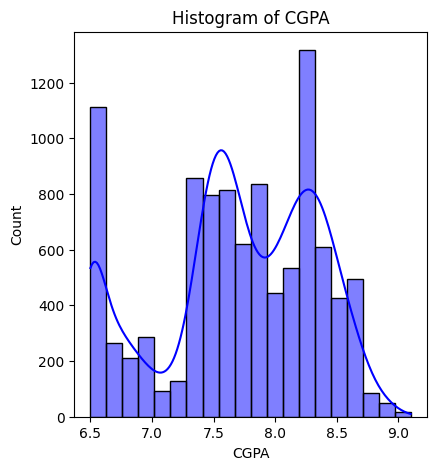

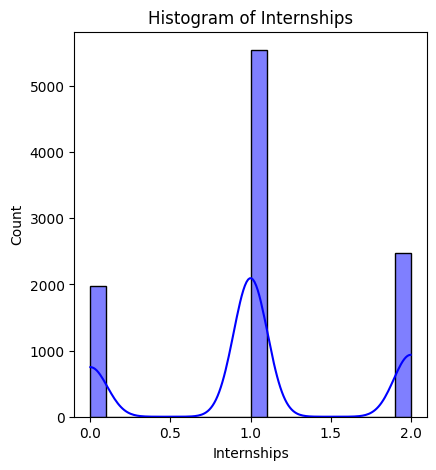

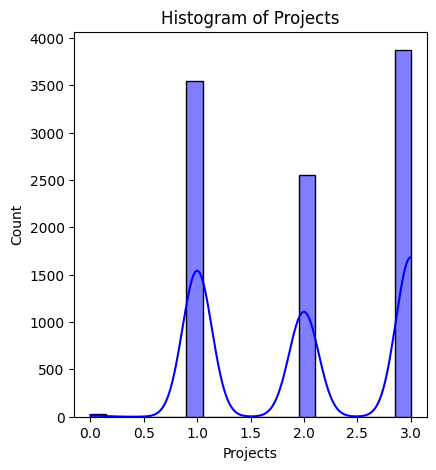

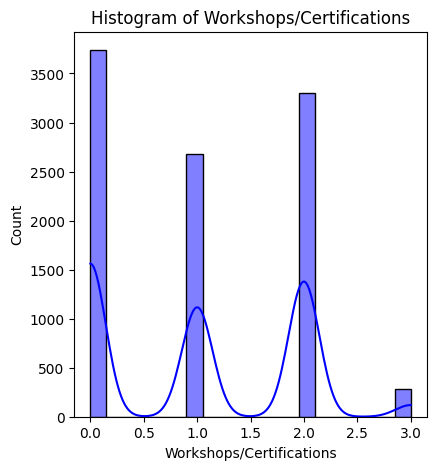

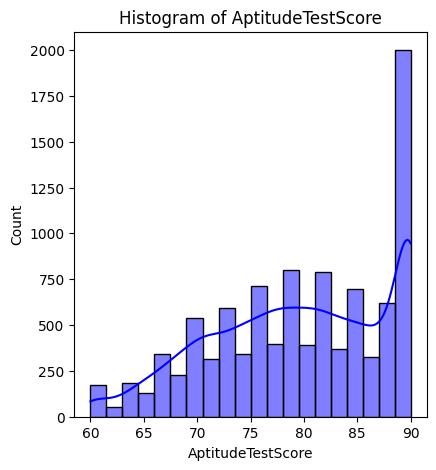

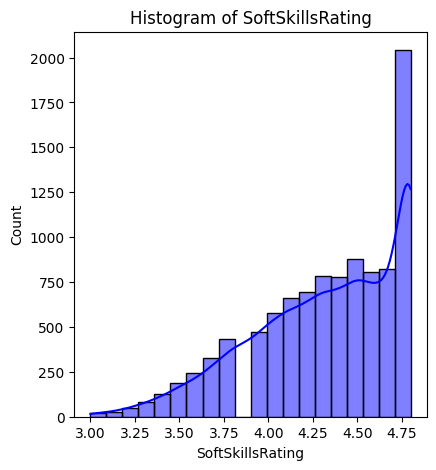

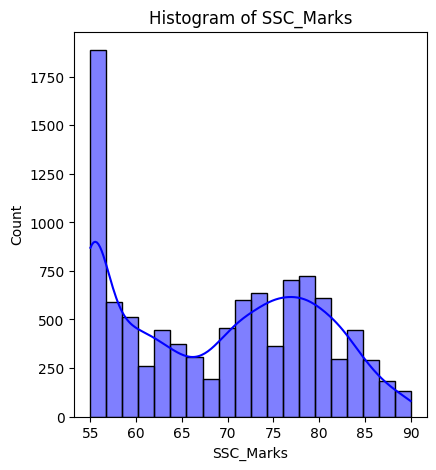

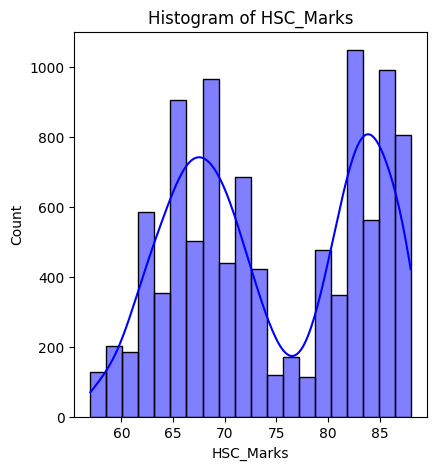

In [ ]:
for col in num_cols:
    plt.figure(figsize=(10, 5))

    # Histogram for numerical columns
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], bins=20,kde=True, color='blue')
    plt.title(f'Histogram of {col}')
    plt.show()

**Analysis based on the histogram**

---



- Most students have completed one internship, this suggest that placemeent is dependent on internships
- The distribution is right-skewed - more students scoring above 80 in aptitude.
- The data is right-skewed in soft-skill distribution - most of the students have a rating between 4 and 4.75.


**Create bar plots for categorical features to visualize the frequency of categories.**

---



In [ ]:
#finding categorical columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns
print(cat_cols)

Index(['StudentID', 'ExtracurricularActivities', 'PlacementTraining',
       'PlacementStatus'],
      dtype='object')


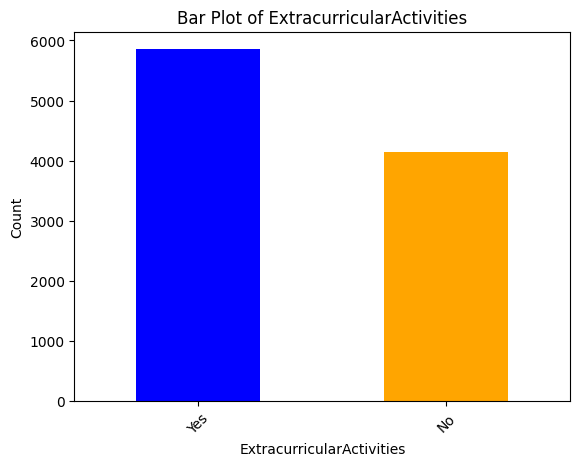

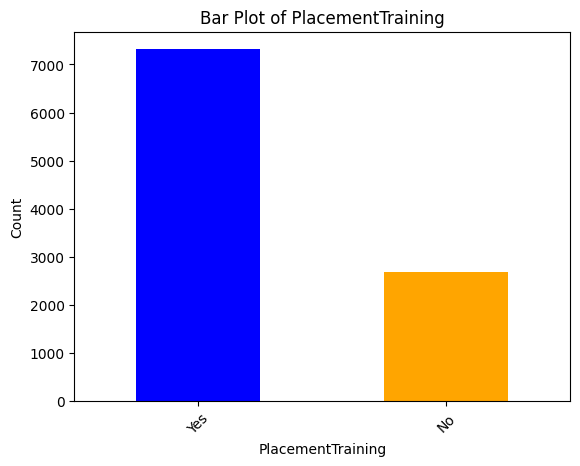

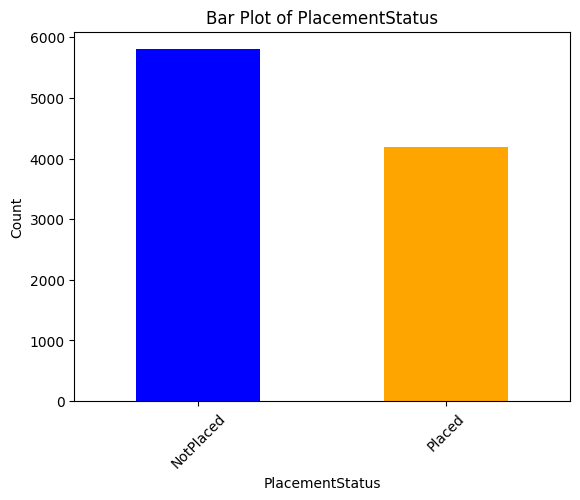

In [ ]:
#creating bar plot
i=1
for col in cat_cols:
    df[col].value_counts().plot(kind='bar', color=['blue', 'orange', 'green', 'red'])
    plt.title(f'Bar Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    if i==1:
        pass
    else:
        plt.show()
    i=i+1

**Analysis based on bar plots**

---


- A higher number of students participate in extracurricular activities suggests that students are actively engaging beyond academics have higher chances of placements
- A  larger number of students received placement training.
This indicates that placement training is a key factor in helping students secure jobs.
- First Class is the most common degree awarded. Since the placement rate is not very high, having a degree alone may not be enough to secure a placement other skills could be necessary.

**Use box plots to identify outliers and understand the spread of the data.**

---



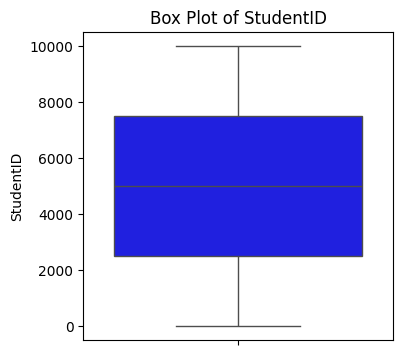

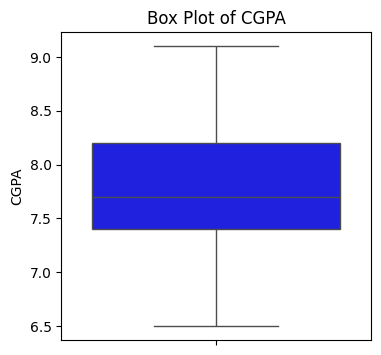

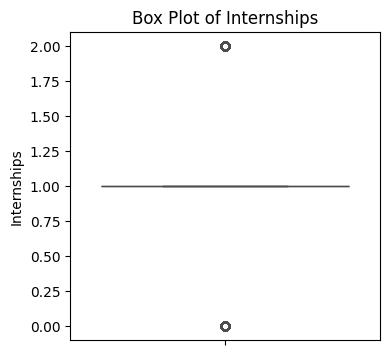

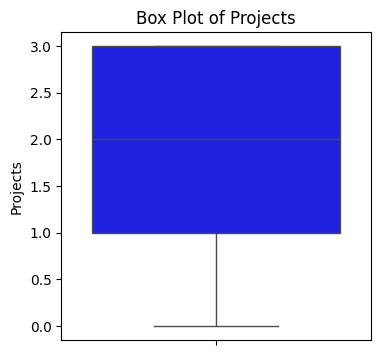

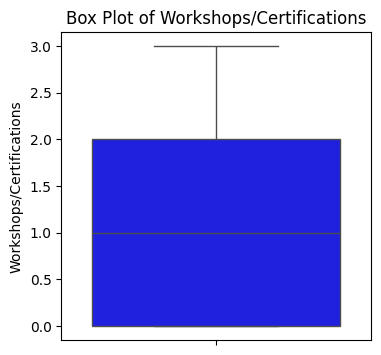

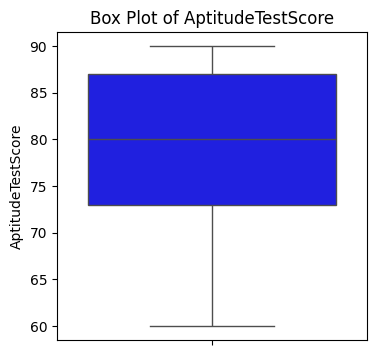

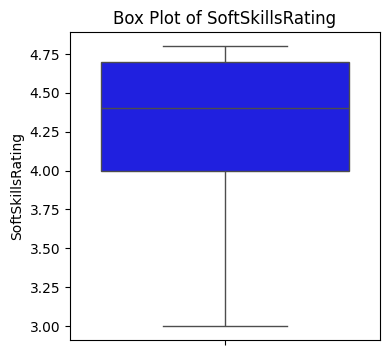

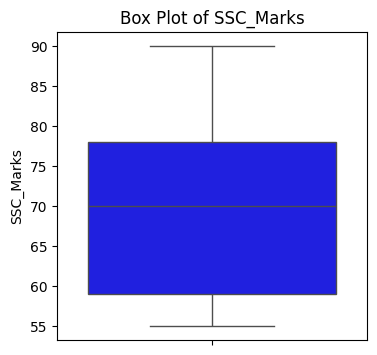

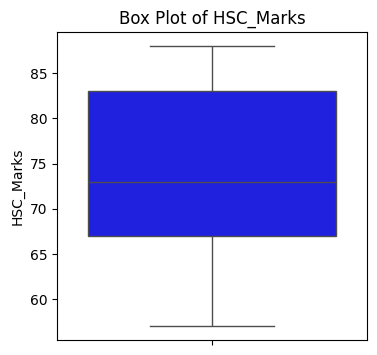

In [ ]:
#box plots to identify outliers
for col in num_cols:
    plt.figure(figsize=(4,4))
    sns.boxplot(y=df[col], color='blue')
    plt.title(f'Box Plot of {col}')
    plt.show()

**Analysis based on box plot**

---



- The median number of internships is 1-meaning most students have completed one internship.
- 0 internships (bottom outlier): A few students have no internships,
- 2 internships (top outlier): A few students have completed more than 1 internship
- The minimum value is 0 - some students haven’t done any projects.
- The maximum value is 3 - no students have done more than 3 projects.
- No ouliers - distribution is consistent

**Use heatmaps to visualize correlations between numerical features.**

---



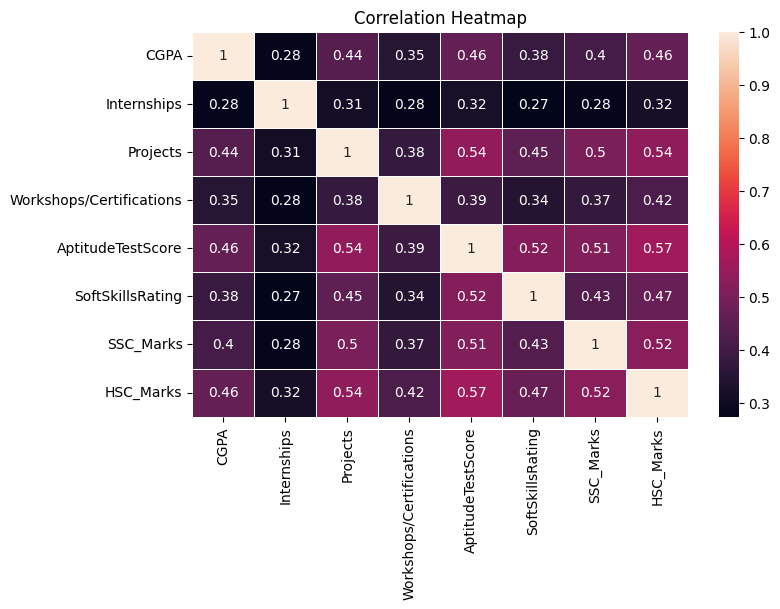

In [ ]:
# Use heatmaps to visualize correlations between numerical features
plt.figure(figsize=(8, 5))
sns.heatmap(df[num_cols].corr(), annot=True, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

**Analysis based on the Heat Map**

---
Positive correlations are usually in shades of pink/purple.
Negative correlation is black.
1. Correlation btwn HSC_marks and AptitudeTestScore 0.57 - Higher HSC marks correspond to better aptitude scores which is a positive correlation.
2.  CGPA and Projects have a correlation of 0.44, it suggests that students involved in more projects tend to have a higher CGPA.
3. A correlation of 0.27 between SoftSkillsRating and Internships indicates a weak positive relationship between the two variables.



**Create scatter plots to explore relationships between numerical features.**

---



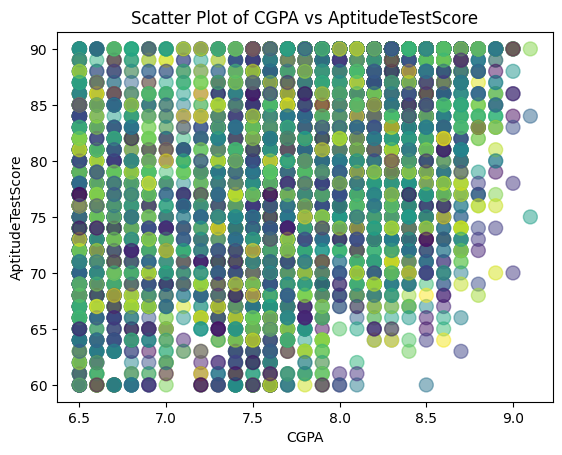

In [ ]:
import matplotlib.pyplot as plt
colors = np.random.rand(len(df))
plt.scatter(df['CGPA'], df['AptitudeTestScore'], c=colors, marker='o', s=100, alpha=0.5)
# Labels and title
# Labels and title
plt.xlabel("CGPA")
plt.ylabel("AptitudeTestScore")
plt.title("Scatter Plot of CGPA vs AptitudeTestScore")

# Show the plot
plt.show()

**Group by Analysis for categorical features**

---



**Inferences based on Group Analysis**

The groupby() function groups the dataset by catogorical features such as  PlacementStatus, then calculate the median for the numerical features such as CGPA and Aptitude test score in the data set. Also, to display the median aggregrated data using groupby () function for projects, workshops/certifications in reference to placementstatus.

Students placements are dependent on many aspects, however based on categorical features we can determine the students placements as mentioned below :

1. Students having a CPGA of 8.2 and above are placed and students having a CGPA of 7.5 and below are not placed.
2. Students having scored 86 marks and above are placed and students having scored 76 marks and below are not placed.
3. Students having worked on 3 or more projects and students having 2 or more workshops/certifications have a fair chance of getting placed.


In [ ]:
import numpy as np
import pandas as pd

newdf = df.copy()
newdf.drop(columns=['StudentID'], inplace=True)
# Group by categorical features and calculate median  for numerical columns
grouped_data_CGPA = newdf.groupby("PlacementStatus")['CGPA'].median()
grouped_data_AptitudeTestScore = newdf.groupby("PlacementStatus")['AptitudeTestScore'].median()

# Display the aggregated data
print(grouped_data_CGPA)
print(grouped_data_AptitudeTestScore)
grouped_data = newdf.groupby("PlacementStatus")[['Projects','Workshops/Certifications']].median()
grouped_data




PlacementStatus
NotPlaced    7.5
Placed       8.2
Name: CGPA, dtype: float64
PlacementStatus
NotPlaced    76.0
Placed       86.0
Name: AptitudeTestScore, dtype: float64


<ipython-input-18-6298b209164e>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data_CGPA = newdf.groupby("PlacementStatus")['CGPA'].median()
<ipython-input-18-6298b209164e>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data_AptitudeTestScore = newdf.groupby("PlacementStatus")['AptitudeTestScore'].median()
<ipython-input-18-6298b209164e>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data =

,Projects,Workshops/Certifications
PlacementStatus,,
NotPlaced,1.0,1.0
Placed,3.0,2.0


**Feature Analysis**

---



**Inferences based on Feature Analysis**

1.Pairwise Relationships:

Each subplot in the pairplot represents scatter plots of key numerical  features based on the placement status.

2.Correlation Relationships:

The Heat map represents correlation between the key numerical features in the identify_data set.

3.Pivot Table :

Pivot table shows the average key numerical fetures for Placed and Not Placed students, helping identify key placement factors.

4.Additional analysis:

Based on Student CGPA analysis placement status using Box plot.



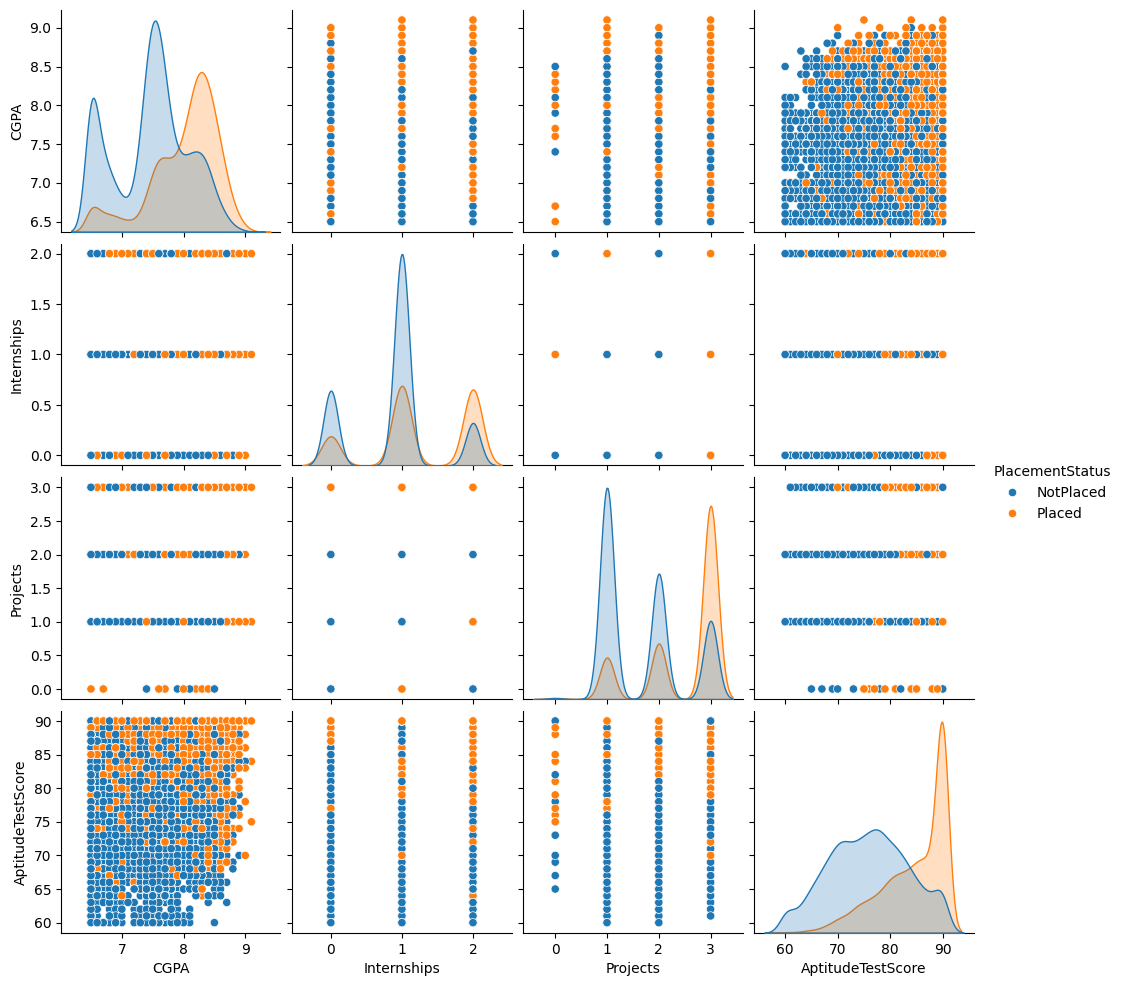

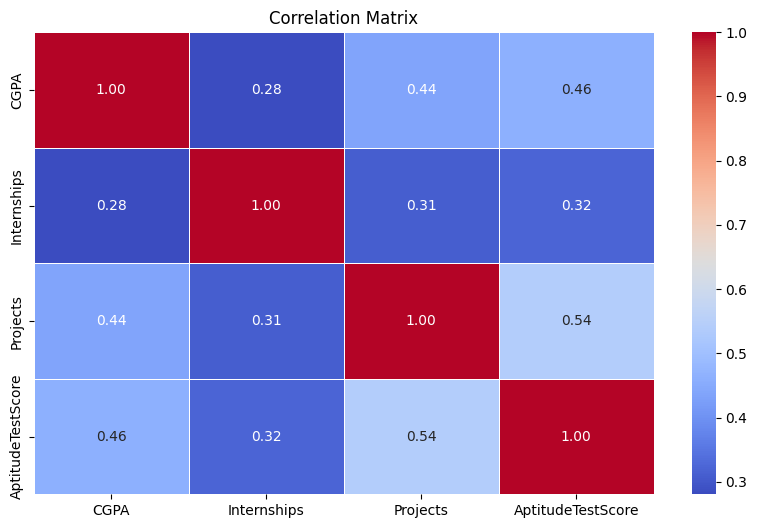

<ipython-input-19-5653514084a3>:25: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(index='PlacementStatus', values=['CGPA', 'Internships', 'Projects', 'AptitudeTestScore'], aggfunc='mean')
<ipython-input-19-5653514084a3>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='PlacementStatus', y='CGPA', data=df, palette='viridis')


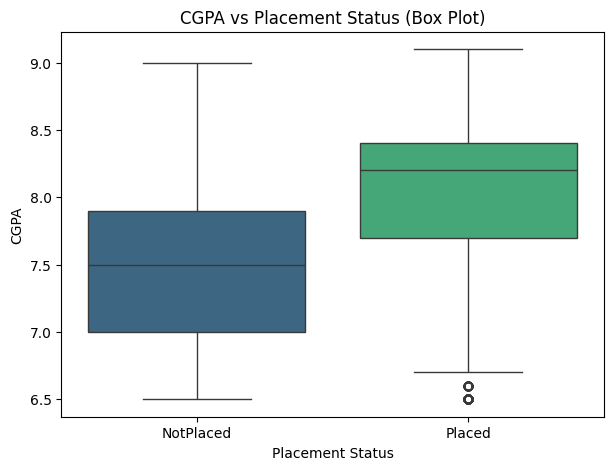

(               CGPA   Internships      Projects  AptitudeTestScore
 count  10000.000000  10000.000000  10000.000000       10000.000000
 mean       7.698010      1.049200      2.026600          79.449900
 std        0.640131      0.665901      0.867968           8.159997
 min        6.500000      0.000000      0.000000          60.000000
 25%        7.400000      1.000000      1.000000          73.000000
 50%        7.700000      1.000000      2.000000          80.000000
 75%        8.200000      1.000000      3.000000          87.000000
 max        9.100000      2.000000      3.000000          90.000000,
                  AptitudeTestScore      CGPA  Internships  Projects
 PlacementStatus                                                    
 NotPlaced                75.829399  7.467672     0.901775  1.675857
 Placed                   84.455802  8.016488     1.253038  2.511556)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Analyze key features
# Identify and analyze key features from dataset: Taken key features like cgpa , internship, project, aptitude test score from the placement dataset
identify_data=df[['CGPA', 'Internships', 'Projects', 'AptitudeTestScore']]
# describe the summary of identify_data
summary = identify_data.describe()
summary

# Step 2: Explore relationships using pair plots
# A pair plot visualizes relationships between numerical features, helping identify patterns of Placement Status
sns.pairplot(df[[ 'CGPA', 'Internships', 'Projects', 'AptitudeTestScore','PlacementStatus']], hue='PlacementStatus')
plt.show()

# Step 3: Explore relationships using Correlation matrices
# Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(identify_data.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# Step 4: Pivot table
# Pivot table shows the mean of numerical fetures based on placment status
pivot_table = df.pivot_table(index='PlacementStatus', values=['CGPA', 'Internships', 'Projects', 'AptitudeTestScore'], aggfunc='mean')
pivot_table

# Step 4: Additional analysis
# Using Student CGPA to analysis student palcement status (Placed, Not placed ) using Box plot
plt.figure(figsize=(7, 5))
sns.boxplot(x='PlacementStatus', y='CGPA', data=df, palette='viridis')
plt.title('CGPA vs Placement Status (Box Plot)')
plt.xlabel('Placement Status')
plt.ylabel('CGPA')
plt.show()

summary, pivot_table


**3.Advanced Python Techniques**

---



**Lambda Functions:**

---




In [ ]:
degree_awarded = lambda x: 'FCD' if x > 8 else ('FC' if (x > 7 and x <= 8) else ('Merit' if (x > 6 and x <= 7) else ('Pass' if (x > 5 and x <= 6) else 'Fail')))
print(degree_awarded(7.5)) # test the lambda function
# df['DegreeAwarded'] = df['CGPA'].apply(degree_awarded) # alternative approach
df['DegreeAwarded']=list(map(degree_awarded,df['CGPA']))
df.head()

FC


,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus,DegreeAwarded
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced,FC
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed,FCD
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced,FC
3,4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed,FC
4,5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed,FCD


**User-Defined Functions:**

---




**Creates a function showing how a student's CGPA compares to their peers based on their ID.**

---



In [ ]:
print(df[['CGPA','StudentID']])
print(df['CGPA'].median())
print(df['CGPA'].max())
df['Rank Based On CGPA']=df['CGPA'].rank(ascending=False).round(0)
print(df.head())
selected_rows=df[df['StudentID']==1]
print(selected_rows['StudentID'])

,StudentID


In [ ]:

def compare_cgpa_to_peers(student_data, student_id):
  selected_rows=student_data[student_data['StudentID']==student_id]
  print('Student Data\n',selected_rows)
  print(type(selected_rows))
  selected_cgpa=selected_rows['CGPA'].values[0] # Access the first element of the Series
  print('CGPA Of Student\n',selected_cgpa)
  population_mean_cgpa=student_data['CGPA'].mean()
  print('population_mean_cgpa\n',population_mean_cgpa)
  population_max_cgpa=student_data['CGPA'].max()
  print('population_max_cgpa\n',population_max_cgpa)
  population_min_cgpa=student_data['CGPA'].min()
  if selected_cgpa > population_mean_cgpa:
    print('Your CGPA is greater than the population mean CGPA')
  else:
    print('Your CGPA is less than the population mean CGPA')
  if(selected_cgpa==population_max_cgpa):
    print('You have the highest CGPA in the population')
  elif(selected_cgpa==population_min_cgpa):
    print('You have the lowest CGPA in the population')

In [ ]:
compare_cgpa_to_peers(df,'1')

**List Comprehensions:Generate List of student who are FCD Holders**

---



In [ ]:

fcd_holders=[stu for stu in df['StudentID'] if df.loc[df['StudentID']==stu,'DegreeAwarded'].values[0]=='FCD']
print(len(fcd_holders) )
# fcd_holders

3534
